# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from pprint import pprint
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

### Set size back to 1500 when done testing ###-----------------------------------------------------------------------------

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [3]:
cities

['torbay',
 'bredasdorp',
 'isla vista',
 'taolanaro',
 'padang',
 'agirish',
 'georgetown',
 'kodiak',
 'hilo',
 'thompson',
 'tuktoyaktuk',
 'chuy',
 'butaritari',
 'longyearbyen',
 'khatanga',
 'avarua',
 'jackson',
 'ilulissat',
 'albany',
 'ushuaia',
 'ulagan',
 'moose factory',
 'punta arenas',
 'codrington',
 'cape town',
 'vila',
 'saint-joseph',
 'qaanaaq',
 'east london',
 'jinchang',
 'bluff',
 'cidreira',
 'ixtapa',
 'horsham',
 'abilene',
 'hobyo',
 'cayenne',
 'port elizabeth',
 'kapaa',
 'hobart',
 'alofi',
 'rapid valley',
 'lagoa',
 'mataura',
 'mount gambier',
 'saint george',
 'mancora',
 'busselton',
 'tiksi',
 'new norfolk',
 'lorengau',
 'bereda',
 'provideniya',
 'zhanaozen',
 'san ignacio',
 'lebu',
 'mahebourg',
 'banavar',
 'jijiga',
 'kunda',
 'campbell river',
 'novobirilyussy',
 'ponta do sol',
 'fallon',
 'kavieng',
 'vaitupu',
 'mombasa',
 'castro',
 'barrow',
 'mar del plata',
 'bengkulu',
 'kaitangata',
 'saskylakh',
 'hermanus',
 'itarema',
 'dongsheng

In [4]:
cities_pd = pd.DataFrame(cities)
cities_pd = cities_pd.rename(columns={0: "City"})
cities_pd["Latitude"] = ""
cities_pd["Longitude"] = ""
cities_pd["Max Temperature"] = ""
cities_pd["Humidity"] = ""
cities_pd["Cloudiness"] = ""
cities_pd["Wind Speed"] = ""
cities_pd["Country"] = ""
cities_pd["Date"] = ""
cities_pd.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,torbay,,,,,,,,
1,bredasdorp,,,,,,,,
2,isla vista,,,,,,,,
3,taolanaro,,,,,,,,
4,padang,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [5]:
### TESTING ### ------------------------------------------------------------------------------------------------------------

# Performing the API calls and printing the log all at once:
city_index = 0
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"

print("Beginning Data Retrieval:")
print("----------------------------------------")

# Creating lists to store the city/location, temp, etc:
location = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

### Remove the range of 10 in 'for loop' once done testing ### -------------------------------------------------------------

for city in cities:
    q_url = f"{url}&appid={weather_api_key}&q={city}&units={units}"
    temp_response = requests.get(q_url).json()
    city_index += 1
    print(f"Processing records: {city_index} of {len(cities)} | {city}")

    try:
        location.append(temp_response['name'])        
        lat.append(temp_response['coord']['lat'])
        long.append(temp_response['coord']['lon'])
        max_temp.append(temp_response['main']['temp'])
        humidity.append(temp_response['main']['humidity'])
        cloudiness.append(temp_response['clouds']['all'])
        wind_speed.append(temp_response['wind']['speed'])
        country.append(temp_response['sys']['country'])
        date.append(temp_response['dt'])
        
    except (KeyError, IndexError):
        print("City not found. Resuming the search now...")
        pass
print("---------------------------------------")
print("Data Retrieval Complete")
print("---------------------------------------")

Beginning Data Retrieval:
----------------------------------------
Processing records: 1 of 622 | torbay
Processing records: 2 of 622 | bredasdorp
Processing records: 3 of 622 | isla vista
Processing records: 4 of 622 | taolanaro
City not found. Resuming the search now...
Processing records: 5 of 622 | padang
Processing records: 6 of 622 | agirish
Processing records: 7 of 622 | georgetown
Processing records: 8 of 622 | kodiak
Processing records: 9 of 622 | hilo
Processing records: 10 of 622 | thompson
Processing records: 11 of 622 | tuktoyaktuk
Processing records: 12 of 622 | chuy
Processing records: 13 of 622 | butaritari
Processing records: 14 of 622 | longyearbyen
Processing records: 15 of 622 | khatanga
Processing records: 16 of 622 | avarua
Processing records: 17 of 622 | jackson
Processing records: 18 of 622 | ilulissat
Processing records: 19 of 622 | albany
Processing records: 20 of 622 | ushuaia
Processing records: 21 of 622 | ulagan
Processing records: 22 of 622 | moose factor

Processing records: 186 of 622 | rabo de peixe
Processing records: 187 of 622 | caramay
Processing records: 188 of 622 | moron
Processing records: 189 of 622 | pavilosta
Processing records: 190 of 622 | gimli
Processing records: 191 of 622 | ribeirao do pinhal
City not found. Resuming the search now...
Processing records: 192 of 622 | veraval
Processing records: 193 of 622 | belushya guba
City not found. Resuming the search now...
Processing records: 194 of 622 | saleaula
City not found. Resuming the search now...
Processing records: 195 of 622 | sioux lookout
Processing records: 196 of 622 | grants
Processing records: 197 of 622 | requena
Processing records: 198 of 622 | tsihombe
City not found. Resuming the search now...
Processing records: 199 of 622 | husavik
Processing records: 200 of 622 | chegdomyn
Processing records: 201 of 622 | litoral del san juan
City not found. Resuming the search now...
Processing records: 202 of 622 | totness
Processing records: 203 of 622 | zhaotong
Pro

Processing records: 361 of 622 | srednekolymsk
Processing records: 362 of 622 | manzil salim
Processing records: 363 of 622 | uyuni
Processing records: 364 of 622 | macheng
Processing records: 365 of 622 | bilma
Processing records: 366 of 622 | lingasad
City not found. Resuming the search now...
Processing records: 367 of 622 | pahrump
Processing records: 368 of 622 | tidore
City not found. Resuming the search now...
Processing records: 369 of 622 | jiaonan
Processing records: 370 of 622 | isangel
Processing records: 371 of 622 | tucuman
Processing records: 372 of 622 | nemuro
Processing records: 373 of 622 | fortuna
Processing records: 374 of 622 | fare
Processing records: 375 of 622 | bargal
City not found. Resuming the search now...
Processing records: 376 of 622 | rio formoso
Processing records: 377 of 622 | atherton
Processing records: 378 of 622 | altay
Processing records: 379 of 622 | beder
Processing records: 380 of 622 | brae
Processing records: 381 of 622 | dharchula
Processi

Processing records: 543 of 622 | zanesville
Processing records: 544 of 622 | gore
Processing records: 545 of 622 | aitape
Processing records: 546 of 622 | micheweni
Processing records: 547 of 622 | strelka
Processing records: 548 of 622 | kazalinsk
City not found. Resuming the search now...
Processing records: 549 of 622 | ottawa
Processing records: 550 of 622 | ust-nera
Processing records: 551 of 622 | semirom
Processing records: 552 of 622 | boguchany
Processing records: 553 of 622 | chaman
Processing records: 554 of 622 | westport
Processing records: 555 of 622 | sholapur
Processing records: 556 of 622 | san cristobal
Processing records: 557 of 622 | tamale
Processing records: 558 of 622 | mabaruma
Processing records: 559 of 622 | skjervoy
Processing records: 560 of 622 | poya
Processing records: 561 of 622 | kenai
Processing records: 562 of 622 | sterling
Processing records: 563 of 622 | antofagasta
Processing records: 564 of 622 | forio
Processing records: 565 of 622 | rio grande


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_pd.count()

City               622
Latitude           622
Longitude          622
Max Temperature    622
Humidity           622
Cloudiness         622
Wind Speed         622
Country            622
Date               622
dtype: int64

In [7]:
# Displaying the DataFrame:
cities_pd = pd.DataFrame({
    "City": location,
    "Latitude": lat,
    "Longitude": long,
    "Max Temperature": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})

cities_pd.head(10)

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.67,-52.73,57.52,71,75,16.11,CA,1594328529
1,Bredasdorp,-34.53,20.04,55.40,76,100,18.34,ZA,1594328529
2,Isla Vista,34.41,-119.86,72.81,77,40,8.05,US,1594328530
3,Padang,-0.95,100.35,76.62,79,97,3.53,ID,1594328530
4,Agirish,61.92,63.02,66.97,82,0,5.06,RU,1594328530
5,George Town,5.41,100.34,79.25,94,40,3.36,MY,1594328407
6,Saint Paul Harbor,57.79,-152.41,64.40,52,75,14.99,US,1594328531
7,Hilo,19.73,-155.09,77.67,69,90,9.17,US,1594328490
8,Thompson,55.74,-97.86,66.20,77,75,12.75,CA,1594328266
9,Tuktoyaktuk,69.45,-133.04,37.40,86,90,12.75,CA,1594328532


In [8]:
# Converting the city data into a 'csv' file:
# Output File (CSV)
cities_output = cities_pd.to_csv('../OutputData/cities.csv', index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
# Find the cities with humidity that is over 100%:

humidity_over100 = cities_pd.sort_values('Humidity', ascending=False)
humidity_over100

#This shows that this particular collection of cities does not have humidity over 100%:

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
138,Soe,-9.86,124.28,60.40,100,98,5.44,ID,1594328562
527,Liepāja,56.54,21.04,50.00,100,72,1.12,LV,1594328663
35,Cayenne,4.93,-52.33,77.00,100,99,6.13,GF,1594328356
297,Lashio,22.93,97.75,69.64,100,100,2.39,MM,1594328603
291,Mackay,-21.15,149.20,63.16,100,40,10.29,AU,1594328602
...,...,...,...,...,...,...,...,...,...
130,Atar,20.52,-13.05,100.81,8,0,10.74,MR,1594328561
62,Fallon,39.47,-118.78,89.60,8,1,6.93,US,1594328543
337,Pahrump,36.21,-115.98,95.09,6,0,8.01,US,1594328614
44,Saint George,37.10,-113.58,100.26,6,1,13.56,US,1594328376


In [18]:
#  Get the indices of cities that have humidity over 100%.

# NONE FOUND; therefore, skipping this portion

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# NONE FOUND; therefore, skipping this portion

In [20]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv

# NONE FOUND; therefore, skipping this portion

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

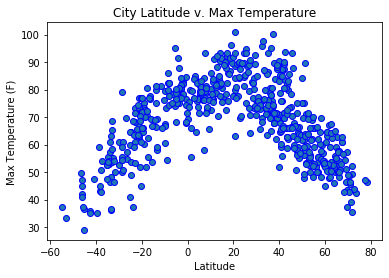

In [36]:
# Plotting latitude v. max_temp:
x = cities_pd['Latitude']
y = cities_pd['Max Temperature']
plt.scatter(x, y, edgecolor='b')
plt.title("City Latitude v. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig('../OutputData/Fig1.png')
plt.show()

## Latitude vs. Humidity Plot

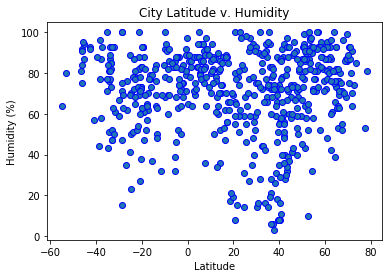

In [37]:
# Plotting latitude v. humidity:
x = cities_pd['Latitude']
y = cities_pd['Humidity']
plt.scatter(x, y, edgecolor='b')
plt.title("City Latitude v. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('../OutputData/Fig2.png')
plt.show()

## Latitude vs. Cloudiness Plot

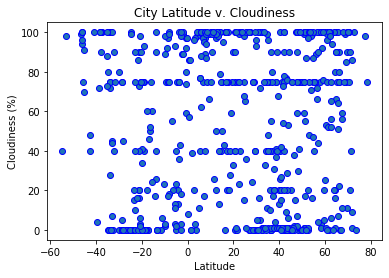

In [38]:
# Plotting latitude v. cloudiness:
x = cities_pd['Latitude']
y = cities_pd['Cloudiness']
plt.scatter(x, y, edgecolor='b')
plt.title("City Latitude v. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('../OutputData/Fig3.png')
plt.show()

## Latitude vs. Wind Speed Plot

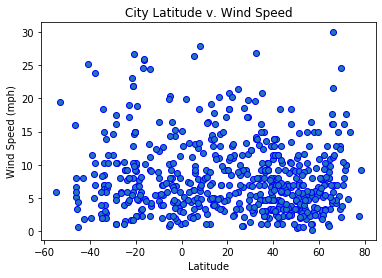

In [39]:
# Plotting latitude v. wind_speed:
x = cities_pd['Latitude']
y = cities_pd['Wind Speed']
plt.scatter(x, y, edgecolor='b')
plt.title("City Latitude v. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('../OutputData/Fig4.png')
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


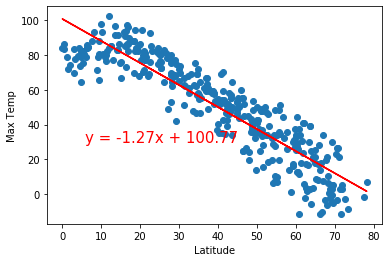

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


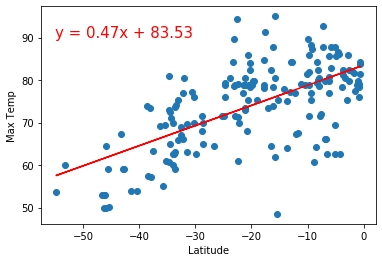

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


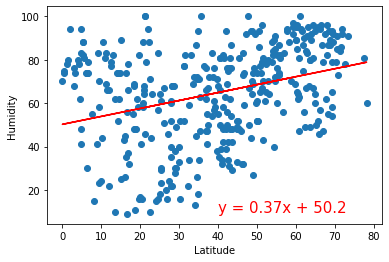

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


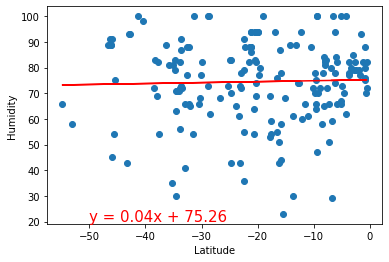

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


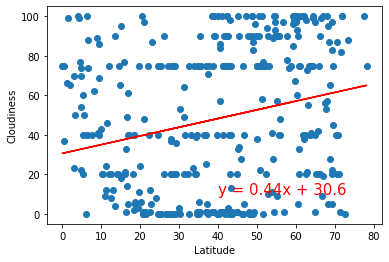

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


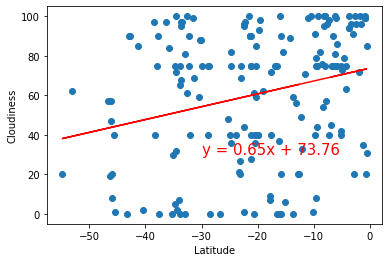

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


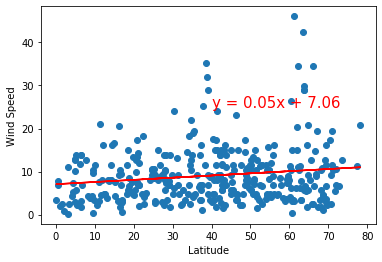

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


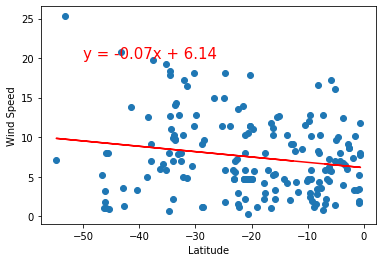